Research Question: We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

In [1]:
#Loading the necessary libraries for our data analysis
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
install.packages("lubridate")
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

(1) Data Description

In [13]:
#Loading Data into local files from Github
url_Players <- "https://raw.githubusercontent.com/rmackean/DSCI100_Individual_Project_RobM/refs/heads/main/players.csv"
url_Sessions <- "https://raw.githubusercontent.com/rmackean/DSCI100_Individual_Project_RobM/refs/heads/main/sessions.csv"
destination_Players <- "./Players.csv"
destination_Sessions <- "./Sessions.csv"
download.file(url_Players,destination_Players)
download.file(url_Sessions,destination_Sessions)
#Reading Datasets and Collecting summary statistics
Players <- read_csv("Players.csv")
Sessions <- read_csv("Sessions.csv")
#Summary Stats for Players Dataset


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics (report values to 2 decimal places), number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

Dataset Variables


Players Dataset 
Players: 196 Unique Players
Variables: 5, 2 quantitative, 3 qualitative
Collection Problems: There may be issues with collection in the identity variables if it was a survey as that introduces the potential for respondants to lie.

Age: Players Age's Range from 9 to 58, with a vast majority around age 19. This is a quantitative variable in our dataset. It may be problematic as the distribution is extremely dense between 17 and 22 with much more limited data in the top and bottom quartiles. There is also an extreme spike at 17 which may also effect the data

In [24]:
Players_Age_Summary<- summary(Players$Age)
Players_Age_Summary


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   17.00   19.00   21.14   22.75   58.00       2 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


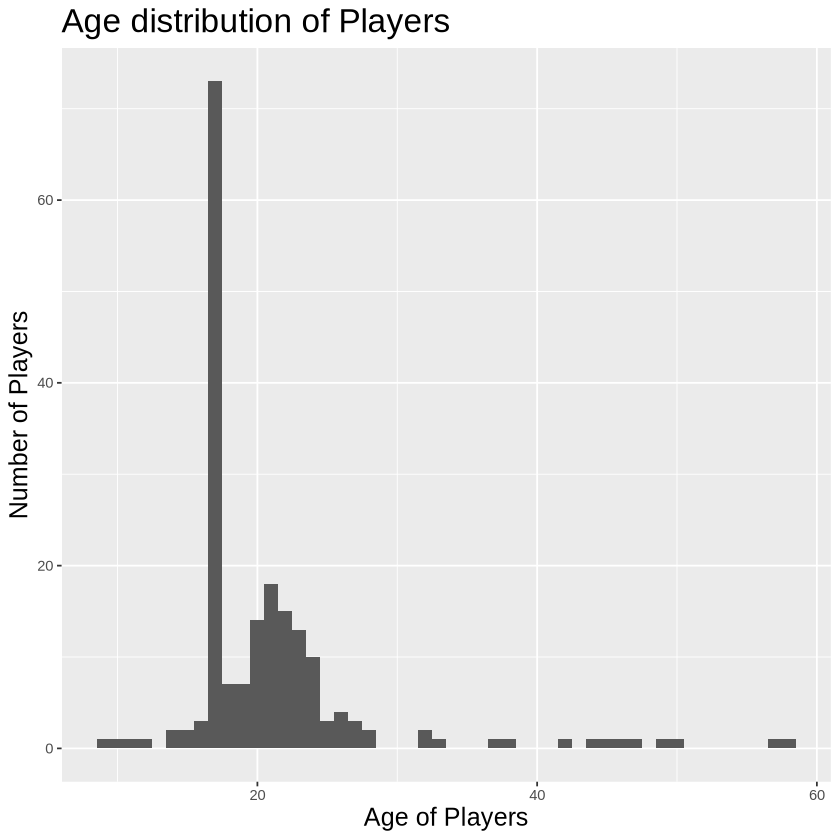

In [31]:
Age_Plot <- ggplot(Players, aes(x=Age))+geom_histogram(bins = 50)+labs(x="Age of Players",y="Number of Players",title = "Age distribution of Players")+
  theme(plot.title = element_text(size = 20))+
  theme(axis.title = element_text(size = 15))
Age_Plot

Experience: The players had a wide variety of experience with a majority falling in either Amateur or Veteran. This distribution may be problematic to work with as there are very few entries in the Pro section compared to the other 4. Experience in this dataset is represented as a qualitative variable with 5 levels.

In [8]:
Players_Experience_Summary <- table(Players$experience)
Players_Experience_Summary


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 

Gender: Similarly to our other qualitative variable, the difference in entries between Male and every other option may be problematic in classification or kknn regressions. The variable has 7 levels and

In [9]:
Players_gender_Summary<- table(Players$gender)
Players_gender_Summary


          Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6 

Played Hours: A quantitative variable with a range from 0 to 223.1 hours played. Like our other quantitative variable, this variable is problematic because its distribution is heavily skewed. The mean is significantly greater then the 3rd quartile(10x), so our data is very heavily skewed right. This may be problematic when trying to utilize the data for regression or classification.

In [10]:
Players_played_hours_Summary<- summary(Players$played_hours)
Players_played_hours_Summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.100   5.846   0.600 223.100 

Sessions Dataset 
Sessions: 1535 Unique Sessions
Variables: 4 quantitative
Collection Problems: There may be issues with collection in the identity variables if it was a survey as that introduces the potential for respondants to lie.
#Summary Stats for Sessions Dataset
Sessions <- mutate(Sessions,start_time = dmy_hm(Sessions$start_time))
Sessions <- mutate(Sessions,end_time = dmy_hm(Sessions$end_time))


start_time: The start time variable is a character entry for date, while it is qualitative in its formatting in our CSV it is a qualitative variable. It presents a challenge because it requires us to convert it to a quantitative variable.

end_time: The end time variable, like start time, is a character entry for date, while it is qualitative in its formatting in our CSV it is a qualitative variable. It presents a challenge because it requires us to convert it to a quantitative variable.

original_start_time: The original start time variable solves this problem of quantative vs qualitative by setting a base time and counting up from there, the problem with this is its not intuitive what that time number means

original_end_time: The original end time variable solves the same problem of quantative vs qualitative that original start time does, the problem, just like start time, is its not intuitive what that time number means.

(2,4) Questions and Methods

Can we use previous start time, end time, and date data to predict the maximum nuumber of active users at any given time.

In order to answer this question we will need to wrangle our data to figure out how many users were online on a specific day at a specific time. Then we need to use that data to identify trends and group data together, for example if day of the week matters, or if month matters. After that we would run a regression of player count onto date and time and produce a confidence interval around our regression. Then we can use the upper limit of that confidence interval to know how many liscences to have ready for any given day and time. We would likely need to assume that month to month does not change the demand and only group by day of the week and time, this is due to our limited dataset. We would also want to use a kknn regression model instead of linear because the small changes in day or time might result in extremely large spikes or drops to player count(Ex. 4-5 pm with people off of work, Thursday vs Friday with people not having work to do Friday night). A linear regression would be too smooth and not account for these extreme differences. 

(3) Exploratory Data Analysis and Visualization

In this assignment, you will:

Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question


In [ ]:
#Sessions Playtime Analysis


Sessions <- mutate(Sessions,Start_hour = hour(Sessions$start_time))
Sessions <- mutate(Sessions,End_hour = hour(Sessions$end_time))
Sessions <- mutate(Sessions,Start_date = date(Sessions$start_time))
Sessions <- mutate(Sessions,end_date = date(Sessions$end_time))
Sessions <- mutate(Sessions,Play_Time_Min = time_length(start_time%--%end_time, unit = "minute"))
Sessions_Play_Time_Min <- summary(Sessions$Play_Time_Min)
Sessions_Play_Time_Min


(5) GitHub Repository